# Telecommunications

**Loading csv files**

In [1]:
TELCO <- read.csv("data/DATA_2.03_Telco.csv")
head(TELCO)

,Calls,Intern,Text,Data,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.12,0.19,23.92,0.18,60
2,1.08,0.22,17.76,0.23,54
3,3.54,0.26,289.79,1.99,34
4,1.09,0.21,19.15,0.21,61
5,1.04,0.24,20.33,0.20,56
6,5.59,0.88,19.23,2.02,41


**Exploring the file**

In [2]:
str(TELCO)

'data.frame':	1000 obs. of  5 variables:
 $ Calls : num  1.12 1.08 3.54 1.09 1.04 5.59 1.19 3.07 5.34 2.43 ...
 $ Intern: num  0.19 0.22 0.26 0.21 0.24 0.88 0.19 0.34 0.99 0.09 ...
 $ Text  : num  23.9 17.8 289.8 19.1 20.3 ...
 $ Data  : num  0.18 0.23 1.99 0.21 0.2 2.02 0.24 2.06 0.97 0.46 ...
 $ Age   : int  60 54 34 61 56 41 71 30 41 33 ...


In [3]:
summary(TELCO)

     Calls           Intern            Text             Data      
 Min.   :0.850   Min.   :0.0900   Min.   : 17.01   Min.   :0.170  
 1st Qu.:1.490   1st Qu.:0.1100   1st Qu.: 20.77   1st Qu.:0.520  
 Median :2.040   Median :0.2200   Median :190.53   Median :1.980  
 Mean   :2.630   Mean   :0.4048   Mean   :225.02   Mean   :1.965  
 3rd Qu.:3.493   3rd Qu.:0.7900   3rd Qu.:449.44   3rd Qu.:2.902  
 Max.   :6.000   Max.   :1.2000   Max.   :598.94   Max.   :4.790  
      Age       
 Min.   :12.00  
 1st Qu.:24.00  
 Median :35.00  
 Mean   :37.78  
 3rd Qu.:51.00  
 Max.   :72.00  

#### Now, let's normalize our variables

In [4]:
# To keep our dataset safe, let's create a copy of it called "testdata"
testdata = TELCO

# the scale function automatically performs data normalization on all your variables
testdata = scale(testdata) 

In [5]:
# the dist() function computes the distances of all the observations in our dataset
d = dist(testdata, method = "euclidean")

# hclust() function performs hiearchical clustering, we pass it the distances, and we set the method argument to "ward.D"
hcward = hclust(d, method="ward.D") 

#### Let's try with 8 segments

In [6]:
# assign our points to our k=8 clusters 
TELCO$groups=cutree(hcward,k=8)

# Aggregation by group and computation of the mean values
aggdata = aggregate(.~ groups, data=TELCO, FUN=mean)

# Computation of the number of observations by group
proptemp = aggregate(Calls~ groups, data=TELCO, FUN=length)

# Computation of the proportion by group
aggdata$proportion=(proptemp$Calls)/sum(proptemp$Calls)

# Ordering from the largest group to the smallest 
aggdata = aggdata[order(aggdata$proportion,decreasing=T),] 

#### Let's try again with 5 segments

In [7]:
# assign our points to our k=5 clusters 
TELCO$groups=cutree(hcward,k=5)

# Aggregation by group and computation of the mean values
aggdata = aggregate(.~ groups, data=TELCO, FUN=mean)

# Computation of the number of observations by group
proptemp = aggregate(Calls~ groups, data=TELCO, FUN=length)

# Computation of the proportion by group
aggdata$proportion=(proptemp$Calls)/sum(proptemp$Calls)

# Ordering from the largest group to the smallest 
aggdata = aggdata[order(aggdata$proportion,decreasing=T),] 

In [8]:
aggdata

,groups,Calls,Intern,Text,Data,Age,proportion
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,3.096028,0.5222997,301.95599,1.9987456,34.46690,0.287
5,5,1.708135,0.1025397,510.65179,3.7330159,18.87698,0.252
1,1,1.021134,0.2044845,20.87433,0.2088144,60.77835,0.194
3,3,5.129716,1.0232955,21.32989,2.0599432,45.90909,0.176
4,4,2.307582,0.1025275,20.57440,0.5201099,35.78022,0.091


#### Writing csv files

In [9]:
write.csv(aggdata, "data/Report_TelCom_aggdata.csv")

#### Data by Group

In [10]:
library(tidyr)

In [11]:
aggdata.long <- aggdata %>% gather(key , value, -groups)   # reshaping data from wide to long
aggdata.long

groups,key,value
<int>,<chr>,<dbl>
2,Calls,3.0960279
5,Calls,1.7081349
1,Calls,1.0211340
3,Calls,5.1297159
4,Calls,2.3075824
2,Intern,0.5222997
5,Intern,0.1025397
1,Intern,0.2044845
3,Intern,1.0232955


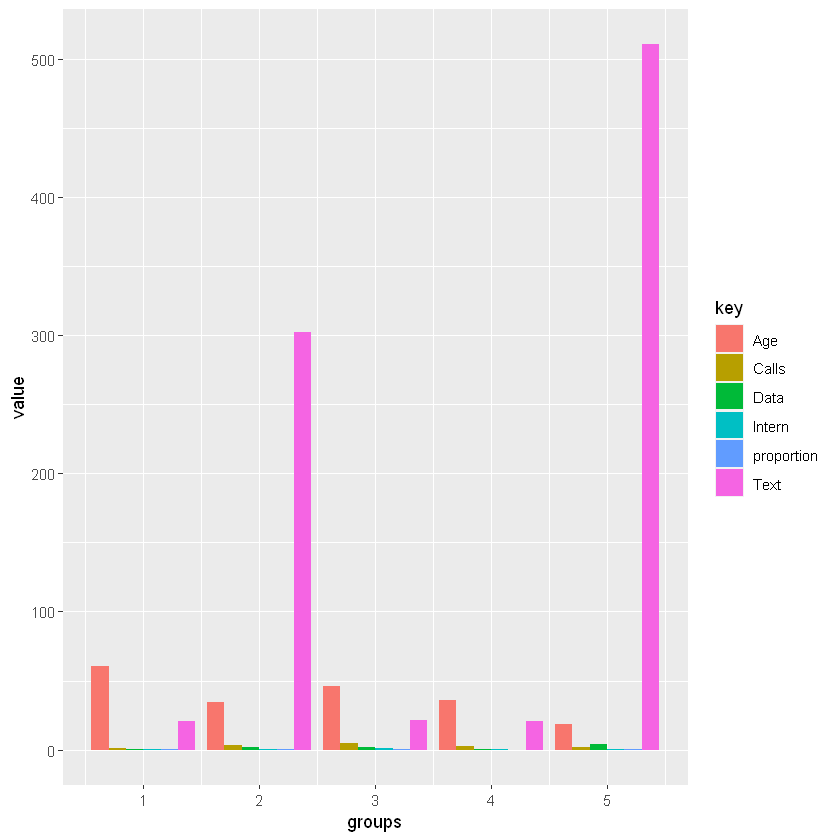

In [12]:
library(ggplot2)
ggplot(data=aggdata.long, aes(x=groups,y=value,fill=key)) + 
  geom_bar(stat="identity",position="dodge")

#### Let's draw the radar chart with the function stars()

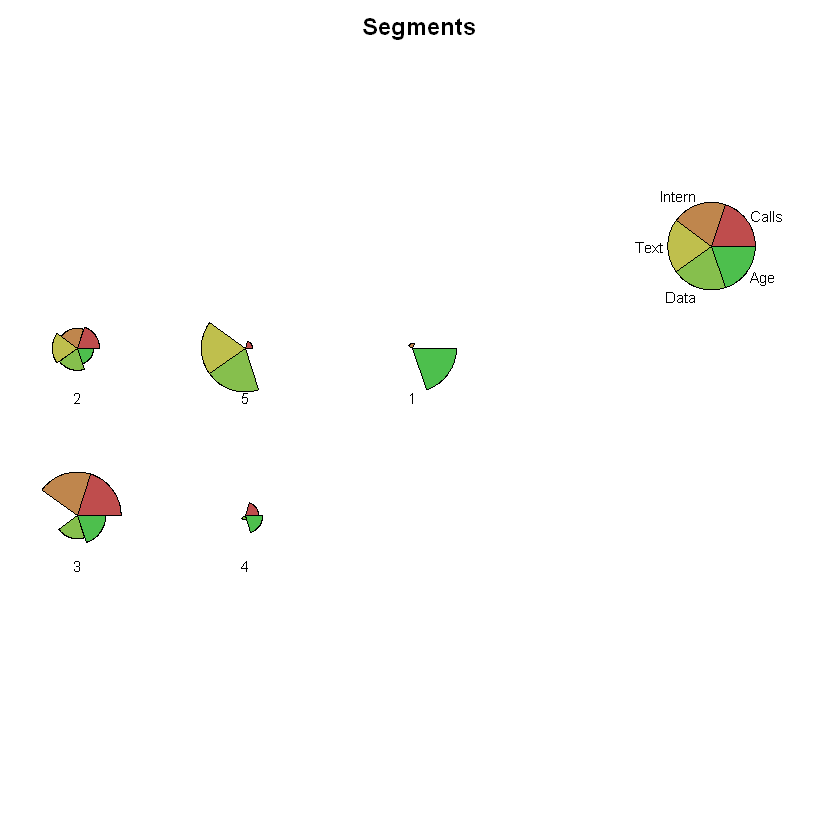

In [13]:
palette(rainbow(12, s = 0.6, v = 0.75))# Select the colors to use

stars(aggdata[,2:(ncol(TELCO))], len = 0.6, key.loc = c(11, 6),xlim=c(2,12),
      main = "Segments", draw.segments = TRUE,nrow = 2, cex = .75,labels=aggdata$groups)